In [387]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [388]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year

p1_lat, p1_lon = 39.835694, -105.359097
p2_lat, p2_lon = 39.855119, -105.297783
p3_lat, p3_lon = 39.655210, -105.402332
p4_lat, p4_lon = 39.965930, -105.440591

# You must request an NSRDB api key from the link above
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'
   
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [389]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,148698,-,-,-,39.97,-105.46,-7,2529,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [390]:
# Return all but first 2 lines of csv to get data:
df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p1_lat, lon=p1_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)

# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
# df.set_index()
# take a look
print('shape:', df.shape)
df.head(8)
# print(df.iloc[2,:])

shape: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-9,145.08,-15,53.54,0.866,750,0.516,3.8,270.0,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-9,139.51,-14,57.22,0.866,750,0.523,3.8,270.0,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-9,133.81,-14,57.23,0.866,750,0.527,3.7,270.0,0,0,0


In [391]:
# df.insert(3, 'MonthDay', df['Month']*100+df['Day']*10+df['Minute'])
dff = df.drop(columns=['Year'], axis=1)

dff.head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0


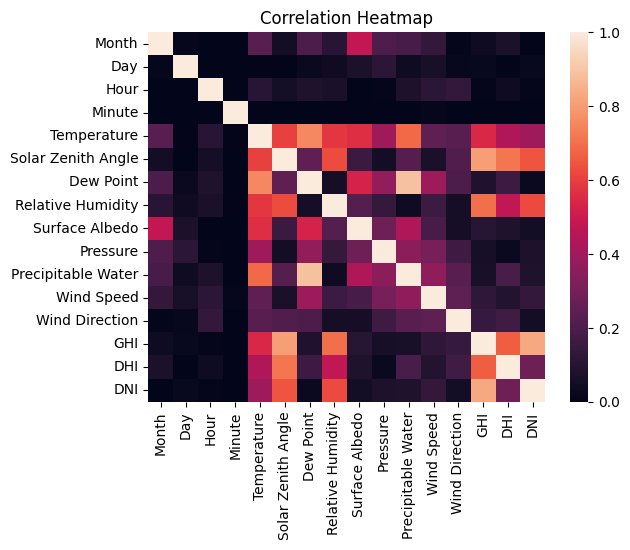

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = abs(dff.corr())
heatmap = sns.heatmap(abs(corr_matrix))
plt.title('Correlation Heatmap')
plt.show()

In [393]:
df['DNI after 0.5h'] = df[['DNI']].shift(1)
df['DNI after 1.0h'] = df[['DNI']].shift(2)
df['DNI after 1.5h'] = df[['DNI']].shift(3)
df['DNI after 2.0h'] = df[['DNI']].shift(4)
df['DNI after 2.5h'] = df[['DNI']].shift(5)
df['DNI after 3.0h'] = df[['DNI']].shift(6)
df['DNI after 3.5h'] = df[['DNI']].shift(7)
df['DNI after 4.0h'] = df[['DNI']].shift(8)
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,...,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,2010,1,1,0,0,-10,163.12,-16,59.53,0.866,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,-10,162.32,-16,55.02,0.866,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,-10,159.50,-16,55.62,0.866,...,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,-9,155.34,-16,55.63,0.866,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,-9,150.42,-15,57.88,0.866,...,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [394]:
sub_df = df.iloc[:, 5:]
sub_df.head()

,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


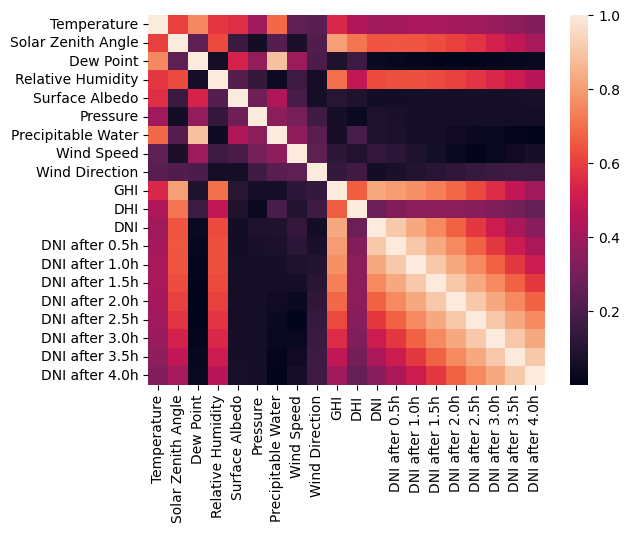

In [395]:
corr_matrix = abs(sub_df.corr()) 
dataplot = sns.heatmap(corr_matrix)
# displaying heatmap
plt.show()

In [396]:
sub_df.drop(['Dew Point', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Wind Direction'], axis=1, inplace=True)
sub_df.head()

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-10,163.12,59.53,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-10,162.32,55.02,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-10,159.50,55.62,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-9,155.34,55.63,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-9,150.42,57.88,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


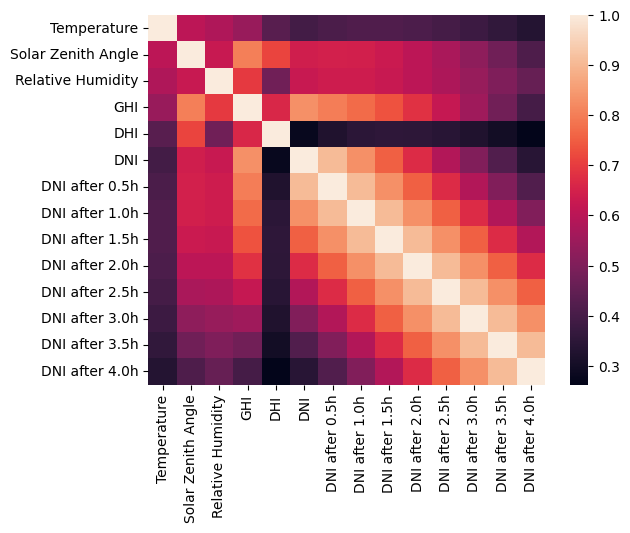

In [397]:
corr_matrix = abs(sub_df.corr()) 
dataplot = sns.heatmap(corr_matrix)
# displaying heatmap
plt.show()

In [398]:
win_size = 8
df_fetures = sub_df.iloc[:,:-8]

X = np.zeros((df_fetures.shape[0] - win_size, win_size * df_fetures.shape[1]))
Y = np.zeros((df_fetures.shape[0] - win_size, 1))

print("Feature array size:{}, Labels array size{}".format(X.shape, Y.shape))

for i in range(X.shape[0]):
    chunk_x = df_fetures.iloc[i:i+win_size, :].to_numpy()
    chunk_y = df_fetures.iloc[i+win_size, -1]
    X[i] = np.reshape(chunk_x, (1, df_fetures.shape[1] * win_size))
    Y[i]= chunk_y
    # if i == 12:
    #     print("X = ", X[i])
    #     print("Y = ", Y[i])

Feature array size:(17512, 48), Labels array size(17512, 1)


In [399]:
# Remove the labels that we are sure they have DNI of 0
zero_index = []
for i in range(31, 50):
    ## 31 means 7pm, and 50 means 5:30 am
    zero_index = zero_index + list(range(i, Y.shape[0], 48))
# zero1 = list(range(34, Y.shape[0], 48))    #10pm
# zero2 = list(range(35, Y.shape[0], 48))    #11pm
print(len(zero_index))
print(np.sum(np.take(Y, zero_index)))

Y = np.delete(Y, zero_index, axis=0)
X = np.delete(X, zero_index, axis=0)

print("Feature array size:{}, Labels array size{}".format(X.shape, Y.shape))


6925
0.0
Feature array size:(10587, 48), Labels array size(10587, 1)


In [400]:
####################### This cell is for prediction not forcasting ############################
# X = dff.iloc[:, :-1]
# Y = dff.iloc[:, -1]
# print("Features array size: ", X.shape)
# print("Labels array size: ", Y.shape)

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
# validation_ratio = 0.15
test_ratio = 0.30

trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)


# valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

sc=StandardScaler()
scaler = sc.fit(trainX)

trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

print("trainx size: ", trainX_scaled.shape)
print("testx size: ", testX_scaled.shape)
print("==============")
print("trainy size: ", trainY.shape)
print("testy size: ", testY.shape)


trainx size:  (7410, 48)
testx size:  (3177, 48)
trainy size:  (7410, 1)
testy size:  (3177, 1)


In [402]:
# let's try linear regression first
from sklearn import linear_model, metrics


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(trainX_scaled, trainY)

# Make predictions using the testing set
y_pred_linreg = regr.predict(testX_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg, squared=False))


Mean Absolute Error: 121.09410653734832
Mean Squared Error: 30894.657464090058
Root Mean Squared Error: 175.76876134310686


In [403]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly')
regressor.fit(trainX_scaled,trainY)
y_pred_svr = regressor.predict(testX_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr, squared=False))


/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 252.1271735758908
Mean Squared Error: 88746.9671952672
Root Mean Squared Error: 297.904292005448


In [404]:
input_shape = trainX.shape[1]
n_batch_size = 128

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)
n_epochs = 120


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:48 
Batch Size:128
Steps per Epoch:57
Validation Steps:20
Test Steps:24
Number of Epochs:120


In [405]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_201 (Dense)           (None, 64)                3136      
                                                                 
 dense_202 (Dense)           (None, 64)                4160      
                                                                 
 dense_203 (Dense)           (None, 1)                 65        
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [406]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# Prepare a directory to store all the checkpoints.
checkpoint_no = 'ckpt_1_ANN'
model_name = 'dnl_forcast_ANN'
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]

history = model.fit(trainX_scaled,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Epoch 1/120
 1/57 [..............................] - ETA: 11s - loss: 303889.3438 - mae: 396.3735INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 4ms/step - loss: 291690.6250 - mae: 393.4323 - val_loss: 166339.7812 - val_mae: 247.5110
Epoch 2/120
 1/57 [..............................] - ETA: 0s - loss: 298066.6250 - mae: 425.5113INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 230896.4062 - mae: 359.9840 - val_loss: 112427.2031 - val_mae: 234.9893
Epoch 3/120
 1/57 [..............................] - ETA: 0s - loss: 170729.2500 - mae: 326.7437INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 154135.1250 - mae: 310.1289 - val_loss: 90229.6953 - val_mae: 238.2802
Epoch 4/120
 1/57 [..............................] - ETA: 0s - loss: 118887.1406 - mae: 275.7096INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 107785.0000 - mae: 266.4265 - val_loss: 74209.0000 - val_mae: 221.5958
Epoch 5/120
51/57 [=========================>....] - ETA: 0s - loss: 75557.2891 - mae: 221.7160INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 4ms/step - loss: 74161.8438 - mae: 218.9385 - val_loss: 54941.4570 - val_mae: 189.5740
Epoch 6/120
 1/57 [..............................] - ETA: 0s - loss: 55747.1328 - mae: 192.7775INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 1s 11ms/step - loss: 55350.7617 - mae: 182.2979 - val_loss: 50180.4922 - val_mae: 182.9673
Epoch 7/120
 1/57 [..............................] - ETA: 0s - loss: 49297.7031 - mae: 183.5175INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 47742.6562 - mae: 166.1349 - val_loss: 45297.0078 - val_mae: 172.9240
Epoch 8/120
57/57 [==============================] - 0s 840us/step - loss: 42644.3320 - mae: 156.8356 - val_loss: 45462.1328 - val_mae: 171.7307
Epoch 9/120
57/57 [==============================] - 0s 921us/step - loss: 40977.9141 - mae: 151.3421 - val_loss: 47331.2266 - val_mae: 178.5344
Epoch 10/120
 1/57 [..............................] - ETA: 0s - loss: 42182.3281 - mae: 165.5481INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 38452.0938 - mae: 146.4758 - val_loss: 44321.0000 - val_mae: 170.5698
Epoch 11/120
 1/57 [..............................] - ETA: 0s - loss: 33332.6406 - mae: 137.6561INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 38140.5234 - mae: 144.0474 - val_loss: 44158.4375 - val_mae: 170.7207
Epoch 12/120
57/57 [==============================] - 0s 811us/step - loss: 35483.9883 - mae: 138.0776 - val_loss: 45340.5508 - val_mae: 174.6500
Epoch 13/120
57/57 [==============================] - 0s 859us/step - loss: 35975.0625 - mae: 137.7865 - val_loss: 44343.6445 - val_mae: 170.1938
Epoch 14/120
57/57 [==============================] - 0s 789us/step - loss: 34344.5781 - mae: 133.8415 - val_loss: 46131.2148 - val_mae: 174.7010
Epoch 15/120
57/57 [==============================] - 0s 760us/step - loss: 34419.4258 - mae: 132.9896 - val_loss: 44600.7070 - val_mae: 170.4700
Epoch 16/120
57/57 [==============================] - 0s 769us/step - loss: 34597.3711 - mae: 131.6546 - val_loss: 45654.4492 - val_mae: 172.7612
Epoch 17/120
 1/57 [..............................] - ETA: 0s - loss: 38901.2969 - mae: 132.0433INFO:tensorflow:Assets written to: ./ckpt_1

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 33569.1484 - mae: 130.3700 - val_loss: 43768.7891 - val_mae: 168.7591
Epoch 18/120
 1/57 [..............................] - ETA: 0s - loss: 33112.7891 - mae: 117.3937INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 31951.0000 - mae: 124.9621 - val_loss: 42506.9062 - val_mae: 168.7479
Epoch 19/120
57/57 [==============================] - 0s 764us/step - loss: 32922.1484 - mae: 127.5096 - val_loss: 43958.9883 - val_mae: 170.1612
Epoch 20/120
 1/57 [..............................] - ETA: 0s - loss: 25463.9883 - mae: 114.1119INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 33028.1992 - mae: 126.1459 - val_loss: 42455.7812 - val_mae: 166.8384
Epoch 21/120
 1/57 [..............................] - ETA: 0s - loss: 32137.4453 - mae: 121.8704INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 32083.0273 - mae: 123.1414 - val_loss: 41467.7109 - val_mae: 162.5729
Epoch 22/120
57/57 [==============================] - 0s 754us/step - loss: 31338.8418 - mae: 121.3491 - val_loss: 42713.8164 - val_mae: 163.0932
Epoch 23/120
 1/57 [..............................] - ETA: 0s - loss: 34163.5742 - mae: 116.3483INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 31111.0684 - mae: 120.8269 - val_loss: 40375.2109 - val_mae: 160.5376
Epoch 24/120
57/57 [==============================] - 0s 814us/step - loss: 32014.6523 - mae: 120.9408 - val_loss: 42031.6211 - val_mae: 161.6615
Epoch 25/120
 1/57 [..............................] - ETA: 0s - loss: 24485.7422 - mae: 101.6931INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 30889.6387 - mae: 118.4629 - val_loss: 39448.4688 - val_mae: 160.3335
Epoch 26/120
57/57 [==============================] - 0s 835us/step - loss: 30637.5859 - mae: 116.5586 - val_loss: 41481.7617 - val_mae: 163.2932
Epoch 27/120
57/57 [==============================] - 0s 837us/step - loss: 31379.7109 - mae: 118.4359 - val_loss: 40917.1523 - val_mae: 159.9483
Epoch 28/120
57/57 [==============================] - 0s 851us/step - loss: 29783.4004 - mae: 114.6780 - val_loss: 41849.0391 - val_mae: 162.3922
Epoch 29/120
57/57 [==============================] - 0s 796us/step - loss: 31322.6953 - mae: 116.8317 - val_loss: 40934.8359 - val_mae: 160.7021
Epoch 30/120
57/57 [==============================] - 0s 795us/step - loss: 29118.6641 - mae: 111.8441 - val_loss: 40883.8945 - val_mae: 162.1184
Epoch 31/120
57/57 [==============================] - 0s 809us/step - loss: 30184.0293 - mae: 115.0534 - val_loss: 40366.5430 - val_mae: 16

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 4ms/step - loss: 28361.3242 - mae: 110.5081 - val_loss: 39408.6641 - val_mae: 157.5219
Epoch 48/120
57/57 [==============================] - 0s 922us/step - loss: 28811.8281 - mae: 109.8640 - val_loss: 44306.5703 - val_mae: 166.3007
Epoch 49/120
57/57 [==============================] - 0s 2ms/step - loss: 27383.2266 - mae: 107.7821 - val_loss: 41481.5391 - val_mae: 161.9707
Epoch 50/120
57/57 [==============================] - 0s 766us/step - loss: 28899.9883 - mae: 110.7571 - val_loss: 42923.1875 - val_mae: 165.7999
Epoch 51/120
57/57 [==============================] - 0s 781us/step - loss: 28140.0117 - mae: 109.3234 - val_loss: 39822.2109 - val_mae: 154.0377
Epoch 52/120
57/57 [==============================] - 0s 758us/step - loss: 28205.7520 - mae: 108.9556 - val_loss: 41642.9688 - val_mae: 162.5993
Epoch 53/120
57/57 [==============================] - 0s 762us/step - loss: 28188.6387 - mae: 108.8908 - val_loss: 41694.5430 - val_mae: 164.

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 28062.8418 - mae: 108.6258 - val_loss: 39242.0000 - val_mae: 158.9198
Epoch 55/120
57/57 [==============================] - 0s 773us/step - loss: 27962.8613 - mae: 108.7386 - val_loss: 40830.3633 - val_mae: 161.6408
Epoch 56/120
57/57 [==============================] - 0s 802us/step - loss: 27736.4805 - mae: 107.9943 - val_loss: 43900.1953 - val_mae: 169.6926
Epoch 57/120
57/57 [==============================] - 0s 846us/step - loss: 27869.4473 - mae: 108.6931 - val_loss: 41180.6953 - val_mae: 163.7303
Epoch 58/120
57/57 [==============================] - 0s 859us/step - loss: 27809.4199 - mae: 108.1630 - val_loss: 42244.4414 - val_mae: 165.8521
Epoch 59/120
57/57 [==============================] - 0s 939us/step - loss: 27796.3594 - mae: 108.4746 - val_loss: 40450.2266 - val_mae: 161.5760
Epoch 60/120
57/57 [==============================] - 0s 852us/step - loss: 28001.8887 - mae: 108.8379 - val_loss: 42307.7266 - val_mae: 16

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 3ms/step - loss: 27296.1758 - mae: 106.1189 - val_loss: 39161.7344 - val_mae: 154.4438
Epoch 90/120
57/57 [==============================] - 0s 1ms/step - loss: 26203.9785 - mae: 104.5532 - val_loss: 43184.0938 - val_mae: 164.9984
Epoch 91/120
57/57 [==============================] - 0s 985us/step - loss: 27449.8516 - mae: 107.5223 - val_loss: 42515.3828 - val_mae: 161.3538
Epoch 92/120
57/57 [==============================] - 0s 904us/step - loss: 26784.3359 - mae: 105.1890 - val_loss: 42468.1992 - val_mae: 168.0418
Epoch 93/120
57/57 [==============================] - 0s 906us/step - loss: 27819.2461 - mae: 108.2081 - val_loss: 40684.6641 - val_mae: 161.4739
Epoch 94/120
57/57 [==============================] - 0s 861us/step - loss: 26712.6270 - mae: 104.7316 - val_loss: 45642.4453 - val_mae: 173.7004
Epoch 95/120
57/57 [==============================] - 0s 798us/step - loss: 26471.3945 - mae: 104.7513 - val_loss: 44151.3867 - val_mae: 168.

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


57/57 [==============================] - 0s 5ms/step - loss: 26551.0449 - mae: 105.0778 - val_loss: 38967.2188 - val_mae: 155.0146
Epoch 116/120
57/57 [==============================] - 0s 883us/step - loss: 26315.3340 - mae: 104.9701 - val_loss: 43292.2305 - val_mae: 165.2348
Epoch 117/120
57/57 [==============================] - 0s 783us/step - loss: 26563.8066 - mae: 104.6099 - val_loss: 45631.2969 - val_mae: 173.4002
Epoch 118/120
57/57 [==============================] - 0s 749us/step - loss: 26689.1465 - mae: 105.4700 - val_loss: 41677.5312 - val_mae: 162.6286
Epoch 119/120
57/57 [==============================] - 0s 3ms/step - loss: 26302.6680 - mae: 104.3273 - val_loss: 45519.6797 - val_mae: 172.2066
Epoch 120/120
57/57 [==============================] - 0s 2ms/step - loss: 26456.5488 - mae: 104.7596 - val_loss: 41848.8047 - val_mae: 161.2453


In [407]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,mae,val_loss,val_mae
0,1,291690.62500,393.432281,166339.781250,247.510986
1,2,230896.40625,359.983978,112427.203125,234.989304
2,3,154135.12500,310.128937,90229.695312,238.280151
3,4,107785.00000,266.426483,74209.000000,221.595825
4,5,74161.84375,218.938507,54941.457031,189.574005


In [408]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,mae,val_loss,val_mae
114,115,26551.044922,105.077751,38967.21875,155.014603


In [409]:
pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

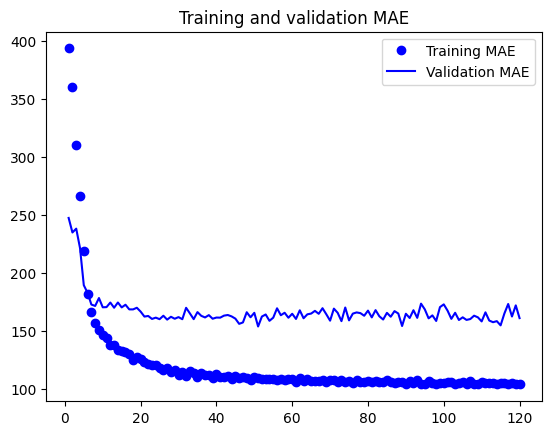

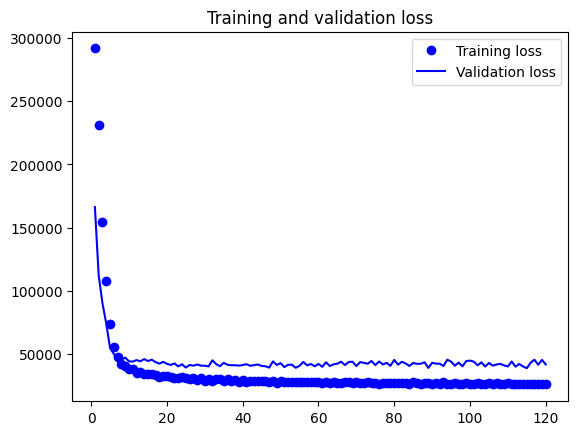

In [410]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [411]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [412]:
k = 5
num_val_samples = len(trainX) // k
all_scores = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('========================')


Processing Fold 0
MAE: 103.58251953125
Processing Fold 1
MAE: 109.24756622314453
Processing Fold 2
MAE: 109.35411071777344
Processing Fold 3
MAE: 107.9531021118164
Processing Fold 4
MAE: 113.7798080444336


In [413]:
for i, val in enumerate(all_scores):
    print('Fold ' + str(i) +': ' + 'MAE of', val)

print('Mean MAE of all folds: ' + str(np.mean(all_scores)))

Fold 0: MAE of 103.58251953125
Fold 1: MAE of 109.24756622314453
Fold 2: MAE of 109.35411071777344
Fold 3: MAE of 107.9531021118164
Fold 4: MAE of 113.7798080444336
Mean MAE of all folds: 108.78342132568359


In [414]:
all_mae_histories = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [415]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]

len(average_mae_history)

120

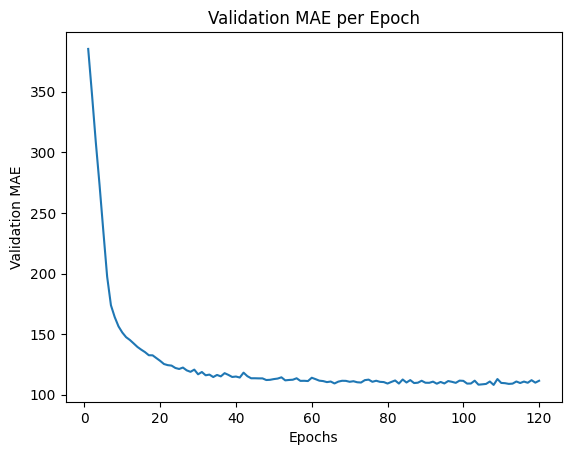

In [416]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [417]:
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)
best_model = load_model(model_name_temp)

/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [418]:
test_loss, test_mae = best_model.evaluate(testX_scaled, testY, steps=n_test_steps)
print()
print('Test MAE:', test_mae)

24/24 [==============================] - 0s 463us/step - loss: 28434.2188 - mae: 113.5237

Test MAE: 113.52374267578125


In [419]:
y_pred = model.predict(testX_scaled)
y_pred[:5]

100/100 [==============================] - 0s 303us/step


array([[972.4818  ],
       [  8.759973],
       [-23.564064],
       [148.35355 ],
       [812.2432  ]], dtype=float32)

In [420]:
df_testY = pd.DataFrame(testY)
df_y_pred = pd.DataFrame(y_pred)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

,Actual,Predicted
0,1026.0,972.481812
1,0.0,8.759973
2,0.0,-23.564064
3,265.0,148.353546
4,964.0,812.243225
...,...,...
3172,1009.0,963.015381
3173,981.0,930.268372
3174,0.0,46.277935
3175,29.0,304.073792


In [421]:
print("Neural Network")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred))
print("=================================================================\n")

print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_linreg))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_linreg, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred_linreg))
print("=================================================================\n")

print("SVR")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred_svr, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred_svr))


Neural Network
Mean Absolute Error: 110.24330474079349
Mean Squared Error: 28400.58036797352
Root Mean Squared Error: 168.52471737989512
Mean Absolute Percentage Error: 7.191741995647432e+16

Linear Regression
Mean Absolute Error: 121.09410653734832
Mean Squared Error: 30894.657464090058
Root Mean Squared Error: 175.76876134310686
Mean Absolute Percentage Error: 9.689863255563592e+16

SVR
Mean Absolute Error: 252.1271735758908
Mean Squared Error: 88746.9671952672
Root Mean Squared Error: 297.904292005448
Mean Absolute Percentage Error: 2.4056939178843744e+17


In [443]:
# make the time stamp matches the test Y
shifted_df = df.iloc[8:, :]
bad_df = shifted_df.isin(shifted_df.iloc[zero_index, :])
df_zero_deleted = shifted_df[~bad_df].dropna()
df_zero_deleted.shape
timest = df_zero_deleted.index[-test_size:]
print(timest)

DatetimeIndex(['2010-09-02 08:00:00', '2010-09-02 08:30:00',
               '2010-09-02 09:00:00', '2010-09-02 09:30:00',
               '2010-09-02 10:00:00', '2010-09-02 10:30:00',
               '2010-09-02 11:00:00', '2010-09-02 11:30:00',
               '2010-09-02 12:00:00', '2010-09-02 12:30:00',
               ...
               '2010-12-31 14:30:00', '2010-12-31 15:00:00',
               '2010-12-31 15:30:00', '2010-12-31 16:00:00',
               '2010-12-31 16:30:00', '2010-12-31 17:00:00',
               '2010-12-31 17:30:00', '2010-12-31 18:00:00',
               '2010-12-31 18:30:00', '2010-12-31 19:00:00'],
              dtype='datetime64[ns]', length=3503, freq=None)


(3503, 1)


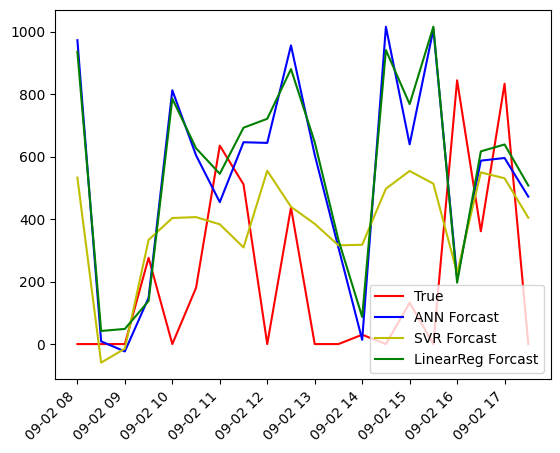

In [450]:
test_size = len(Y_test)

np.reshape(Y_test,Y_test.shape[0])
print(Y_test.shape)
k =20
plt.plot(timest[:k], Y_test[:k], 'r', label='True')
plt.plot(timest[:k], y_pred[:k], 'b', label='ANN Forcast')
plt.plot(timest[:k], y_pred_svr[:k], 'y', label='SVR Forcast')
plt.plot(timest[:k], y_pred_linreg[:k], 'g', label='LinearReg Forcast')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [463]:
import basemap
import matplotlib.animation

fig = plt.figure(figsize=(27, 20))
m = basemap(projection='mill', lon_0=0)
m.drawcoastlines(color='r', linewidth=1.0)


TypeError: 'module' object is not callable

<Figure size 2700x2000 with 0 Axes>